Zadanie.

Dla stacji pomiarowej PM10 w Krakowie (PL0012A) zbuduj model prognostyczny na podstawie danych PM10Krakow_do10st.csv.
Dane opisują sytuację z temperaturą <= 10 ⁰C. Jakie czynniki decydują o wielkości koncentracji.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
pm10=pd.read_csv('PM10Krakow_do10st.csv')
pm10.head(5)

,Code,Concentration,TimeSM,T,H%,Wind_dir,Wind_vel,UR200,WA200,GR200,...,CorIN2,CorOUT2,CorIN6,CorOUT6,CorIN10,CorOUT10,CorIN15,CorOUT15,CorIN30,CorOUT30
0,PL0012A,254.931,2015-12-31 23:00:00,-10.3,92.0,"Calm, no wind",0.0,60.41,0.0,0.0,...,0.8975,0.8975,0.56875,0.56875,0.37875,0.37875,0.26875,0.26875,0.1675,0.1675
1,PL0012A,303.558,2016-01-01 00:00:00,-10.6,93.0,"Calm, no wind",0.0,60.41,0.0,0.0,...,0.8975,0.8975,0.56875,0.56875,0.37875,0.37875,0.26875,0.26875,0.1675,0.1675
2,PL0012A,289.828,2016-01-01 01:00:00,-11.0,92.0,"Calm, no wind",0.0,60.41,0.0,0.0,...,0.8975,0.8975,0.56875,0.56875,0.37875,0.37875,0.26875,0.26875,0.1675,0.1675
3,PL0012A,279.998,2016-01-01 02:00:00,-11.0,93.0,Wind blowing from the east-northeast,1.0,60.41,0.0,0.0,...,0.7950,0.8500,0.84000,0.59000,0.66500,0.42000,0.50500,0.37000,0.4100,0.1900
4,PL0012A,289.167,2016-01-01 03:00:00,-11.6,93.0,Wind blowing from the north-east,1.0,60.41,0.0,0.0,...,0.6300,0.9100,0.69000,0.75000,0.34000,0.50000,0.15000,0.52000,0.0400,0.2300


In [3]:
pm10.describe()

,Concentration,T,H%,Wind_vel,UR200,WA200,GR200,IN200,RO200,UR600,...,CorIN2,CorOUT2,CorIN6,CorOUT6,CorIN10,CorOUT10,CorIN15,CorOUT15,CorIN30,CorOUT30
count,11661.000000,11661.000000,11661.000000,11661.000000,1.166100e+04,11661.0,11661.0,1.166100e+04,1.166100e+04,11661.00,...,11661.000000,11661.000000,11661.000000,11661.000000,11661.000000,11661.000000,11661.000000,11661.000000,11661.000000,11661.000000
mean,72.953937,2.083269,85.071435,3.240117,6.041000e+01,0.0,0.0,9.710000e+00,2.316000e+01,35.13,...,0.841325,0.855445,0.591349,0.679055,0.380833,0.473271,0.288253,0.368492,0.157655,0.238917
std,56.264132,5.332912,11.961178,2.359494,1.421146e-14,0.0,0.0,3.552866e-15,7.105732e-15,0.00,...,0.105259,0.110705,0.166071,0.177732,0.167615,0.233328,0.183150,0.233609,0.147118,0.227392
min,3.000000,-23.500000,25.000000,0.000000,6.041000e+01,0.0,0.0,9.710000e+00,2.316000e+01,35.13,...,0.630000,0.630000,0.190000,0.190000,0.070000,0.070000,0.030000,0.030000,0.010000,0.010000
25%,35.058100,-0.800000,79.000000,1.000000,6.041000e+01,0.0,0.0,9.710000e+00,2.316000e+01,35.13,...,0.795000,0.795000,0.440000,0.568750,0.340000,0.340000,0.150000,0.150000,0.040000,0.040000
50%,57.936000,2.800000,88.000000,3.000000,6.041000e+01,0.0,0.0,9.710000e+00,2.316000e+01,35.13,...,0.850000,0.897500,0.590000,0.690000,0.345000,0.390000,0.268750,0.300000,0.150000,0.167500
75%,93.102300,6.100000,94.000000,5.000000,6.041000e+01,0.0,0.0,9.710000e+00,2.316000e+01,35.13,...,0.910000,0.950000,0.690000,0.840000,0.420000,0.665000,0.370000,0.520000,0.190000,0.410000
max,444.367000,10.000000,100.000000,16.000000,6.041000e+01,0.0,0.0,9.710000e+00,2.316000e+01,35.13,...,1.000000,1.000000,0.990000,0.990000,0.990000,0.990000,0.860000,0.860000,0.780000,0.780000


In [4]:
correlations_data = pm10.corr()['Concentration'].sort_values()
# Print the most negative correlations
print(correlations_data, '\n')

T               -4.684875e-01
Wind_vel        -4.467257e-01
CorOUT6         -1.858482e-01
CorOUT10        -1.708070e-01
CorOUT30        -1.543287e-01
CorOUT15        -1.448120e-01
CorOUT2         -4.329044e-03
WA2000          -4.762571e-15
RO1000          -4.753072e-15
RO2000          -4.601828e-15
IN2000          -4.554172e-15
IN4000          -4.486353e-15
UR200           -4.477678e-15
IN600           -4.466670e-15
UR2000          -4.465626e-15
WA600           -4.423909e-15
UR4000          -4.385340e-15
GR2000          -4.381832e-15
WA1000          -4.299050e-15
IN1000          -4.279760e-15
RO4000          -4.268855e-15
WA4000           4.150274e-15
UR600            4.325198e-15
GR4000           4.471468e-15
IN200            4.520526e-15
RO200            4.564221e-15
UR1000           4.570835e-15
GR1000           4.687529e-15
GR600            4.704977e-15
CorIN15          2.718874e-02
CorIN2           3.943662e-02
CorIN30          4.126418e-02
CorIN10          4.685097e-02
H%        

In [5]:
pm10B=pm10[['Concentration', 'T', 'Wind_vel','CorOUT6','CorIN6','H%']]

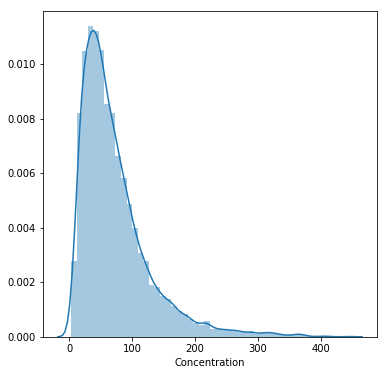

In [9]:
plt.subplots(figsize=(6,6))
sns.distplot(pm10B['Concentration']);

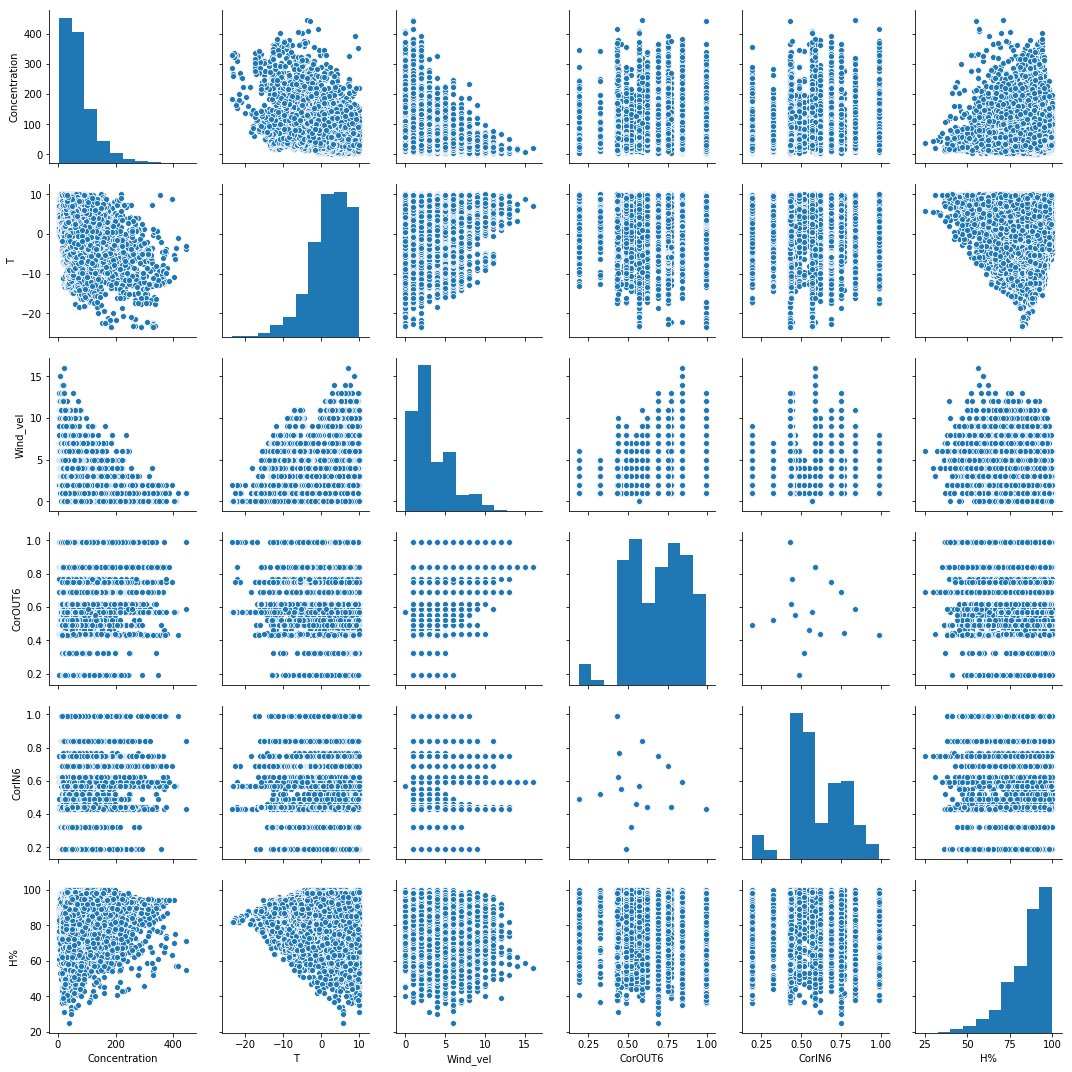

In [10]:
sns.pairplot(pm10B);

In [11]:
X=pm10B[['T', 'Wind_vel', 'CorOUT6', 'CorIN6', 'H%']]
y=pm10B[['Concentration']]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.4, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print(lm.intercept_)

[141.61122941]


In [16]:
coef=lm.coef_.transpose()

In [17]:
coeff_df = pd.DataFrame(coef,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-4.540490
Wind_vel,-10.672794
CorOUT6,4.455968
CorIN6,35.142349
H%,-0.571334


In [24]:
predictions = lm.predict(X_test)

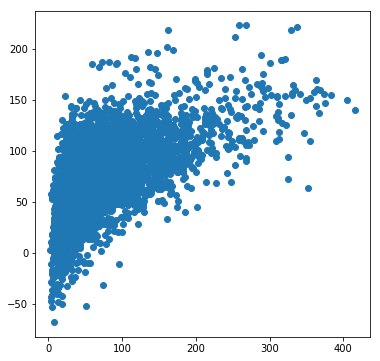

In [19]:
plt.subplots(figsize=(6,6))
plt.scatter(y_test,predictions);

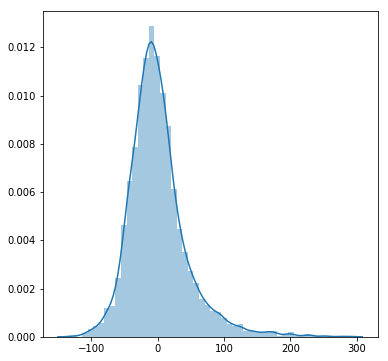

In [20]:
plt.subplots(figsize=(6,6))
sns.distplot((y_test-predictions),bins=50);

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 31.63823077191375
MSE: 1963.1059014431685
RMSE: 44.306950938235055


In [34]:
pp=predictions.reshape(-1)

In [35]:
y_testa=np.array(y_test).reshape(-1)

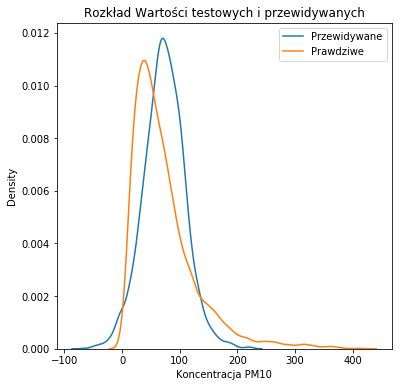

In [36]:
# Density plot of the final predictions and the test values
plt.subplots(figsize=(6,6))
sns.kdeplot(pp, label = 'Przewidywane')
sns.kdeplot(y_testa, label = 'Prawdziwe')

# Label the plot
plt.xlabel('Koncentracja PM10'); plt.ylabel('Density');
plt.title('Rozkład Wartości testowych i przewidywanych');

###  Random forest

In [44]:
y_traina=np.array(y_train).reshape(-1)
y_testa=np.array(y_test).reshape(-1)

In [45]:
random_forest = RandomForestRegressor(random_state=60,n_estimators=100)
random_forest.fit(X_train,y_traina)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=60, verbose=0, warm_start=False)

In [46]:
predictions = random_forest.predict(X_test)

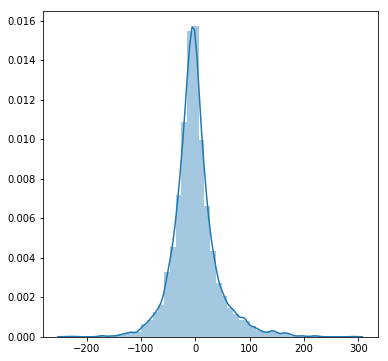

In [47]:
plt.subplots(figsize=(6,6))
sns.distplot((y_testa-predictions),bins=50);

In [48]:
print('MAE:', metrics.mean_absolute_error(y_testa, predictions))
print('MSE:', metrics.mean_squared_error(y_testa, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_testa, predictions)))

MAE: 28.507873824783445
MSE: 1727.3632368245078
RMSE: 41.56155960529522


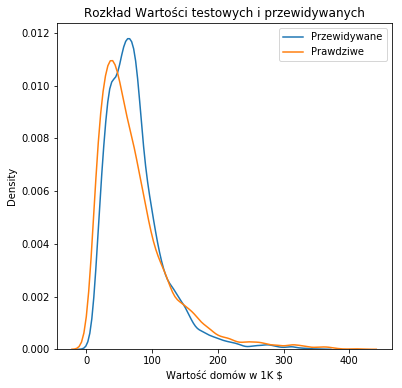

In [50]:
# Density plot of the final predictions and the test values
plt.subplots(figsize=(6,6))
sns.kdeplot(predictions, label = 'Przewidywane')
sns.kdeplot(y_testa, label = 'Prawdziwe')

# Label the plot
plt.xlabel('Wartość domów w 1K $'); plt.ylabel('Density');
plt.title('Rozkład Wartości testowych i przewidywanych');

In [51]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(X.columns), 
                                'importance': random_forest.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(12)

,feature,importance
0,T,0.438538
1,Wind_vel,0.228101
2,H%,0.199645
3,CorIN6,0.076152
4,CorOUT6,0.057564


### Optymalizacja modelu

In [53]:
from pprint import pprint

pprint(random_forest.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 60,
 'verbose': 0,
 'warm_start': False}


In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [55]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 4,
                               scoring = 'neg_mean_absolute_error',verbose=1, random_state=42, n_jobs = -1,
                              return_train_score = True)
# Fit the random search model
rf_random.fit(X_train, y_traina)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.1min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [56]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [57]:
random_forest = RandomForestRegressor(random_state=60,n_estimators=200,min_samples_split=5, min_samples_leaf=2,
                                     max_features='sqrt',max_depth=10,bootstrap=True)
random_forest.fit(X_train,y_traina)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=60, verbose=0, warm_start=False)

In [58]:
predictions = random_forest.predict(X_test)

In [59]:
print('MAE:', metrics.mean_absolute_error(y_testa, predictions))
print('MSE:', metrics.mean_squared_error(y_testa, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_testa, predictions)))

MAE: 27.318807825465605
MSE: 1570.7436324433613
RMSE: 39.63260819632442
